In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
engine = create_engine("sqlite:////Users/nathanieldirenzo/Documents/GitHub/NBM_EDA_Student/resources/get_mta/mta_data.db")

In [3]:
df = pd.read_sql('SELECT * FROM mta_data ORDER BY RANDOM() LIMIT 100000;', engine)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,PTH16,R550,01-00-07,LACKAWANNA,1,PTH,07/01/2021,07:39:37,REGULAR,113401,42551
1,R168A,R168,00-00-01,96 ST,123,IRT,02/15/2021,00:00:00,REGULAR,6479325,2764829
2,N057,R188,00-05-01,50 ST,CE,IND,06/10/2021,16:00:00,REGULAR,196608,65994
3,H028,R266,00-06-01,HALSEY ST,L,BMT,03/20/2021,20:00:00,REGULAR,74166359,34696225
4,N315,R238,00-00-00,STEINWAY ST,MR,IND,05/01/2021,12:00:00,REGULAR,4936590,7538216


In [4]:
df = df.rename(columns={'C/A': 'control_area', 'UNIT': 'unit', 'SCP': 'subunit_channel_pos', 'STATION':'station', 'LINENAME':'subway_lines', 'DIVISION':'division', 'DATE':'date', 'TIME':'time', 'DESC':'desc', 'ENTRIES':'entries', 'EXITS':'exits'})

In [5]:
df= df.sort_values(by=['control_area', 'unit', 'subunit_channel_pos', 'station', 'date', 'time'])

In [6]:
df['date_time'] = df.date + ' ' + df.time

In [7]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time
3072,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2021,07:00:00,REGULAR,7524084,2564500,01/29/2021 07:00:00
82580,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/07/2021,19:00:00,REGULAR,7527867,2566231,02/07/2021 19:00:00
41946,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2021,15:00:00,REGULAR,7542437,2572939,03/10/2021 15:00:00
98873,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2021,19:00:00,REGULAR,7543801,2573529,03/12/2021 19:00:00
92169,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2021,16:00:00,REGULAR,7557494,2581182,04/16/2021 16:00:00


In [8]:
df['net_entries'] = df.entries.diff()
df['net_exits'] = df.exits.diff()
df['net_traffic'] = df.entries.diff() + df.exits.diff()

In [9]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time,net_entries,net_exits,net_traffic
3072,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2021,07:00:00,REGULAR,7524084,2564500,01/29/2021 07:00:00,NaN,NaN,NaN
82580,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/07/2021,19:00:00,REGULAR,7527867,2566231,02/07/2021 19:00:00,3783.0,1731.0,5514.0
41946,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2021,15:00:00,REGULAR,7542437,2572939,03/10/2021 15:00:00,14570.0,6708.0,21278.0
98873,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2021,19:00:00,REGULAR,7543801,2573529,03/12/2021 19:00:00,1364.0,590.0,1954.0
92169,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2021,16:00:00,REGULAR,7557494,2581182,04/16/2021 16:00:00,13693.0,7653.0,21346.0


In [10]:
df.date_time = pd.to_datetime(df['date_time'], format = '%m/%d/%Y %H:%M:%S')

In [11]:
df['audit_length_hours'] = df.date_time.diff() / pd.Timedelta(hours=1)

In [12]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time,net_entries,net_exits,net_traffic,audit_length_hours
3072,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2021,07:00:00,REGULAR,7524084,2564500,2021-01-29 07:00:00,NaN,NaN,NaN,NaN
82580,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/07/2021,19:00:00,REGULAR,7527867,2566231,2021-02-07 19:00:00,3783.0,1731.0,5514.0,228.0
41946,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2021,15:00:00,REGULAR,7542437,2572939,2021-03-10 15:00:00,14570.0,6708.0,21278.0,740.0
98873,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2021,19:00:00,REGULAR,7543801,2573529,2021-03-12 19:00:00,1364.0,590.0,1954.0,52.0
92169,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2021,16:00:00,REGULAR,7557494,2581182,2021-04-16 16:00:00,13693.0,7653.0,21346.0,837.0


In [13]:
df['avg_hourly_entries'] = df['net_entries'] / df['audit_length_hours']
df['avg_hourly_exits'] = df['net_exits'] / df['audit_length_hours']
df['avg_hourly_traffic'] = df['net_traffic'] / df['audit_length_hours']

In [14]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic
3072,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2021,07:00:00,REGULAR,7524084,2564500,2021-01-29 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82580,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/07/2021,19:00:00,REGULAR,7527867,2566231,2021-02-07 19:00:00,3783.0,1731.0,5514.0,228.0,16.592105,7.592105,24.184211
41946,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2021,15:00:00,REGULAR,7542437,2572939,2021-03-10 15:00:00,14570.0,6708.0,21278.0,740.0,19.689189,9.064865,28.754054
98873,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2021,19:00:00,REGULAR,7543801,2573529,2021-03-12 19:00:00,1364.0,590.0,1954.0,52.0,26.230769,11.346154,37.576923
92169,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2021,16:00:00,REGULAR,7557494,2581182,2021-04-16 16:00:00,13693.0,7653.0,21346.0,837.0,16.359618,9.143369,25.502987


In [15]:
df['pct_change_entries'] = df['net_entries'].pct_change() * 100
df['pct_change_exits'] = df['net_exits'].pct_change() * 100
df['pct_change_traffic'] = df['net_traffic'].pct_change() * 100

In [16]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,...,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic,pct_change_entries,pct_change_exits,pct_change_traffic
3072,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/29/2021,07:00:00,REGULAR,7524084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82580,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/07/2021,19:00:00,REGULAR,7527867,...,3783.0,1731.0,5514.0,228.0,16.592105,7.592105,24.184211,NaN,NaN,NaN
41946,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2021,15:00:00,REGULAR,7542437,...,14570.0,6708.0,21278.0,740.0,19.689189,9.064865,28.754054,285.144066,287.521664,285.890461
98873,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/12/2021,19:00:00,REGULAR,7543801,...,1364.0,590.0,1954.0,52.0,26.230769,11.346154,37.576923,-90.638298,-91.204532,-90.816806
92169,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/16/2021,16:00:00,REGULAR,7557494,...,13693.0,7653.0,21346.0,837.0,16.359618,9.143369,25.502987,903.885630,1197.118644,992.425793


In [17]:
df['turnstile_id_code'] = df.control_area + '_' + df.unit + '_' + df.subunit_channel_pos

In [18]:
df = df.drop(labels=['control_area', 'unit', 'subunit_channel_pos', 'entries', 'exits'],axis=1)



In [19]:
df.head()

,station,subway_lines,division,date,time,desc,date_time,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic,pct_change_entries,pct_change_exits,pct_change_traffic,turnstile_id_code
3072,59 ST,NQR456W,BMT,01/29/2021,07:00:00,REGULAR,2021-01-29 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A002_R051_02-00-00
82580,59 ST,NQR456W,BMT,02/07/2021,19:00:00,REGULAR,2021-02-07 19:00:00,3783.0,1731.0,5514.0,228.0,16.592105,7.592105,24.184211,NaN,NaN,NaN,A002_R051_02-00-00
41946,59 ST,NQR456W,BMT,03/10/2021,15:00:00,REGULAR,2021-03-10 15:00:00,14570.0,6708.0,21278.0,740.0,19.689189,9.064865,28.754054,285.144066,287.521664,285.890461,A002_R051_02-00-00
98873,59 ST,NQR456W,BMT,03/12/2021,19:00:00,REGULAR,2021-03-12 19:00:00,1364.0,590.0,1954.0,52.0,26.230769,11.346154,37.576923,-90.638298,-91.204532,-90.816806,A002_R051_02-00-00
92169,59 ST,NQR456W,BMT,04/16/2021,16:00:00,REGULAR,2021-04-16 16:00:00,13693.0,7653.0,21346.0,837.0,16.359618,9.143369,25.502987,903.885630,1197.118644,992.425793,A002_R051_02-00-00


In [20]:
cols = df.columns.tolist()
cols

['station',
 'subway_lines',
 'division',
 'date',
 'time',
 'desc',
 'date_time',
 'net_entries',
 'net_exits',
 'net_traffic',
 'audit_length_hours',
 'avg_hourly_entries',
 'avg_hourly_exits',
 'avg_hourly_traffic',
 'pct_change_entries',
 'pct_change_exits',
 'pct_change_traffic',
 'turnstile_id_code']

In [21]:
cols = cols[-1:] + cols[:-1]
cols

['turnstile_id_code',
 'station',
 'subway_lines',
 'division',
 'date',
 'time',
 'desc',
 'date_time',
 'net_entries',
 'net_exits',
 'net_traffic',
 'audit_length_hours',
 'avg_hourly_entries',
 'avg_hourly_exits',
 'avg_hourly_traffic',
 'pct_change_entries',
 'pct_change_exits',
 'pct_change_traffic']

In [22]:
df = df[cols]

In [23]:
df.head()

,turnstile_id_code,station,subway_lines,division,date,time,desc,date_time,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic,pct_change_entries,pct_change_exits,pct_change_traffic
3072,A002_R051_02-00-00,59 ST,NQR456W,BMT,01/29/2021,07:00:00,REGULAR,2021-01-29 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82580,A002_R051_02-00-00,59 ST,NQR456W,BMT,02/07/2021,19:00:00,REGULAR,2021-02-07 19:00:00,3783.0,1731.0,5514.0,228.0,16.592105,7.592105,24.184211,NaN,NaN,NaN
41946,A002_R051_02-00-00,59 ST,NQR456W,BMT,03/10/2021,15:00:00,REGULAR,2021-03-10 15:00:00,14570.0,6708.0,21278.0,740.0,19.689189,9.064865,28.754054,285.144066,287.521664,285.890461
98873,A002_R051_02-00-00,59 ST,NQR456W,BMT,03/12/2021,19:00:00,REGULAR,2021-03-12 19:00:00,1364.0,590.0,1954.0,52.0,26.230769,11.346154,37.576923,-90.638298,-91.204532,-90.816806
92169,A002_R051_02-00-00,59 ST,NQR456W,BMT,04/16/2021,16:00:00,REGULAR,2021-04-16 16:00:00,13693.0,7653.0,21346.0,837.0,16.359618,9.143369,25.502987,903.885630,1197.118644,992.425793


In [31]:
df.groupby(['turnstile_id_code','station', 'date'])[["net_traffic"]].sum()

net_traffic
turnstile_id_code   station       date                   
A002_R051_02-00-00  59 ST         01/29/2021          0.0
                                  02/07/2021       5514.0
                                  03/10/2021      21278.0
                                  03/12/2021       1954.0
                                  04/16/2021      21346.0
...                                                   ...
TRAM2_R469_00-05-01 RIT-ROOSEVELT 10/13/2021          5.0
                                  10/30/2021         28.0
                                  11/18/2021        114.0
                                  12/08/2021        105.0
                                  12/31/2020       -360.0

[97733 rows x 1 columns]

In [24]:
nta_map = gpd.read_file('/Users/nathanieldirenzo/Documents/GitHub/NYC_MTA_EDA_Project/nynta2020.shp')
nta_map.head()
nta_map.to_crs(4326, inplace=True)
nta_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

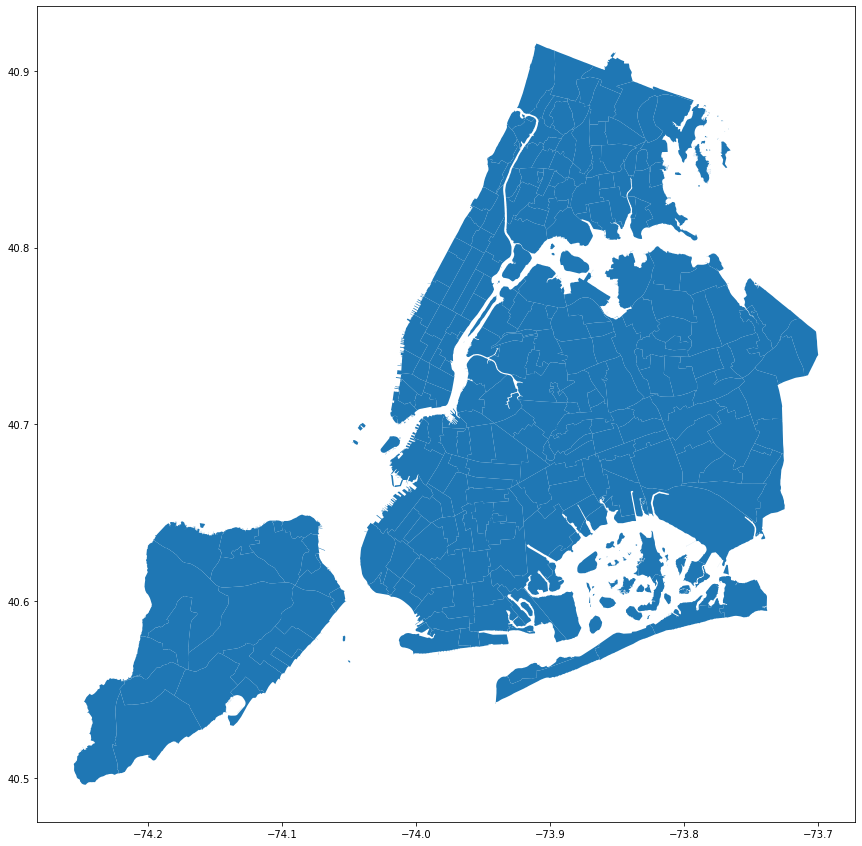

In [25]:
fig,ax = plt.subplots(figsize=(15,15))
nta_map.plot(ax=ax)

In [26]:
station_df = gpd.read_file('Subway Stations.geojson')
station_df

,name,url,line,objectid,notes,geometry
0,Astor Pl,http://web.mta.info/nyct/service/,4-6-6 Express,1,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-73.99107 40.73005)
1,Canal St,http://web.mta.info/nyct/service/,4-6-6 Express,2,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-74.00019 40.71880)
2,50th St,http://web.mta.info/nyct/service/,1-2,3,"1-all times, 2-nights",POINT (-73.98385 40.76173)
3,Bergen St,http://web.mta.info/nyct/service/,2-3-4,4,"4-nights, 3-all other times, 2-all times",POINT (-73.97500 40.68086)
4,Pennsylvania Ave,http://web.mta.info/nyct/service/,3-4,5,"4-nights, 3-all other times",POINT (-73.89489 40.66471)
...,...,...,...,...,...,...
468,Coney Island - Stillwell Av,http://web.mta.info/nyct/service/,D-F-N-Q,469,"D,F,N,Q-all times",POINT (-73.98124 40.57728)
469,34th St - Hudson Yards,http://web.mta.info/nyct/service/,7-7 Express,470,"7-all times, 7 Express-rush hours AM westbound...",POINT (-74.00220 40.75545)
470,72nd St,http://web.mta.info/nyct/service/,Q,641,Q-all times,POINT (-73.95836 40.76880)
471,86th St,http://web.mta.info/nyct/service/,Q,642,Q-all times,POINT (-73.95177 40.77786)


In [27]:
station_df.head()

,name,url,line,objectid,notes,geometry
0,Astor Pl,http://web.mta.info/nyct/service/,4-6-6 Express,1,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-73.99107 40.73005)
1,Canal St,http://web.mta.info/nyct/service/,4-6-6 Express,2,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-74.00019 40.71880)
2,50th St,http://web.mta.info/nyct/service/,1-2,3,"1-all times, 2-nights",POINT (-73.98385 40.76173)
3,Bergen St,http://web.mta.info/nyct/service/,2-3-4,4,"4-nights, 3-all other times, 2-all times",POINT (-73.97500 40.68086)
4,Pennsylvania Ave,http://web.mta.info/nyct/service/,3-4,5,"4-nights, 3-all other times",POINT (-73.89489 40.66471)


In [28]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in station_df['geometry']]
geometry[:3]

In [29]:
geo_df = gpd.GeoDataFrame(df2, geometry=geometry)
geo_df.head()
geo_df = geo_df.set_crs('EPSG:4326')
#nta_map['data_norm'] = nta_map['geometry']/nta_map.area

NameError: name 'df2' is not defined

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Station')

In [ ]:
fig,ax = plt.subplots(figsize=(20,20))
nta_map.plot(ax=ax,)
geo_df.plot(ax=ax, markersize=20, color='red', marker='o', label = 'Station')